In [131]:
# setup - height map/basin area problem
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
from time import perf_counter

depth = np.loadtxt("day09-input.txt",dtype = str)
test = np.loadtxt("day09-test.txt",dtype = str)

In [90]:
# # test data
# rows = len(test)
# line0 = list(test[0])
# cols = len(line0)
# data_test2 = np.tile(0,(rows,cols))
# for i in range(len(test)):
#     line = list(test[i])
#     for j in range(len(line)):
#         data_test2[i,j] = int(line[j])

        
# input data
rows = len(depth)
line0 = list(depth[0])
cols = len(line0)
data_test = np.tile(0,(rows,cols))
for i in range(len(depth)):
    line = list(depth[i])
    for j in range(len(line)):
        data_test[i,j] = int(line[j])

In [132]:
# Part 1: determine the number of low points
s = perf_counter()

n_edge = [0,0,0,0]
n_corner = [0,0,0]
n = [0,0,0,0,0]
lowpoints = []
count = 0
risk = 0

for i in range(len(data_test)):
    for j in range(len(data_test[i])):
        target = data_test[i,j]
        
        # first row 
        if i == 0:
            if j == 0:
                n_corner[0] = target
                n_corner[1] = data_test[i,j+1]
                n_corner[2] = data_test[i+1,j]
                if min(n_corner) == target:
                    if n_corner.count(target) == 1:
                        count += 1
                        risk += target + 1
                        lowpoints.append([i,j])
                        #print('low point found 1:',target)
            if j > 0:
                if j != cols-1:
                    n_edge[0] = target
                    n_edge[1] = data_test[i,j+1]
                    n_edge[2] = data_test[i,j-1]
                    n_edge[3] = data_test[i+1,j]
                    if min(n_edge) == target:
                        if n_edge.count(target) == 1:
                            count += 1
                            risk += target + 1
                            lowpoints.append([i,j])
                            #print('low point found 2:',target)
            if j == cols -1:
                n_corner[0] = target
                n_corner[1] = data_test[i,j-1]
                n_corner[2] = data_test[i+1,j]
                if min(n_corner) == target:
                    if n_corner.count(target) == 1:
                        count += 1
                        risk += target + 1
                        lowpoints.append([i,j])
                        #print('low point found 3:',target)
       
        # main body of data
        if i > 0:
            if i != rows-1:
                if j == 0:
                    n_edge[0] = target
                    n_edge[1] = data_test[i,j+1]
                    n_edge[2] = data_test[i-1,j]
                    n_edge[3] = data_test[i+1,j]
                    if min(n_edge) == target:
                        if n_edge.count(target) == 1:
                            count += 1
                            risk += target + 1
                            lowpoints.append([i,j])
                            #print('low point found 4:',target)
                if j > 0:
                    if j != cols-1:
                        n[0] = target
                        n[1] = data_test[i,j+1]
                        n[2] = data_test[i,j-1]
                        n[3] = data_test[i+1,j]
                        n[4] = data_test[i-1,j]
                        if min(n) == target:
                            if n.count(target) == 1:
                                count += 1
                                risk += target + 1
                                lowpoints.append([i,j])
                                #print('low point found 5:',target)
                if j == cols - 1:
                    n_edge[0] = target
                    n_edge[1] = data_test[i,j-1]
                    n_edge[2] = data_test[i-1,j]
                    n_edge[3] = data_test[i+1,j]
                    if min(n_edge) == target:
                        if n_edge.count(target) == 1:
                            count += 1
                            risk += target + 1
                            lowpoints.append([i,j])
                            #print('low point found 6:',target)
        
        # last row
        if i == rows-1:
            if j == 0:
                n_corner[0] = target
                n_corner[1] = data_test[i,j+1]
                n_corner[2] = data_test[i-1,j]
                if min(n_corner) == target:
                    if n_corner.count(target) == 1:
                        count += 1
                        risk += target + 1
                        lowpoints.append([i,j])
                        #print('low point found 7:',target)
            if j > 0:
                if j != cols -1:
                    n_edge[0] = target
                    n_edge[1] = data_test[i,j+1]
                    n_edge[2] = data_test[i,j-1]
                    n_edge[3] = data_test[i-1,j]
                    if min(n_edge) == target:
                        if n_edge.count(target) == 1:
                            count += 1
                            risk += target + 1
                            lowpoints.append([i,j])
                            #print('low point found 8:',target)
            if j == cols - 1:
                n_corner[0] = target
                n_corner[1] = data_test[i,j-1]
                n_corner[2] = data_test[i-1,j]
                if min(n_corner) == target:
                    if n_corner.count(target) == 1:
                        count += 1
                        risk += target + 1
                        lowpoints.append([i,j])
                        #print('low point found 9:',target)
    n_edge = [0,0,0,0]
    n_corner = [0,0,0]
    n = [0,0,0,0,0]
    target = 0
print('Part 1 Solution = ',risk)
# Solution = 558, confirmed 12/9/2021
e = perf_counter()
time = round((e - s),4)
print('Time Elapsed =',time)

Part 1 Solution =  558
Time Elapsed = 0.0299


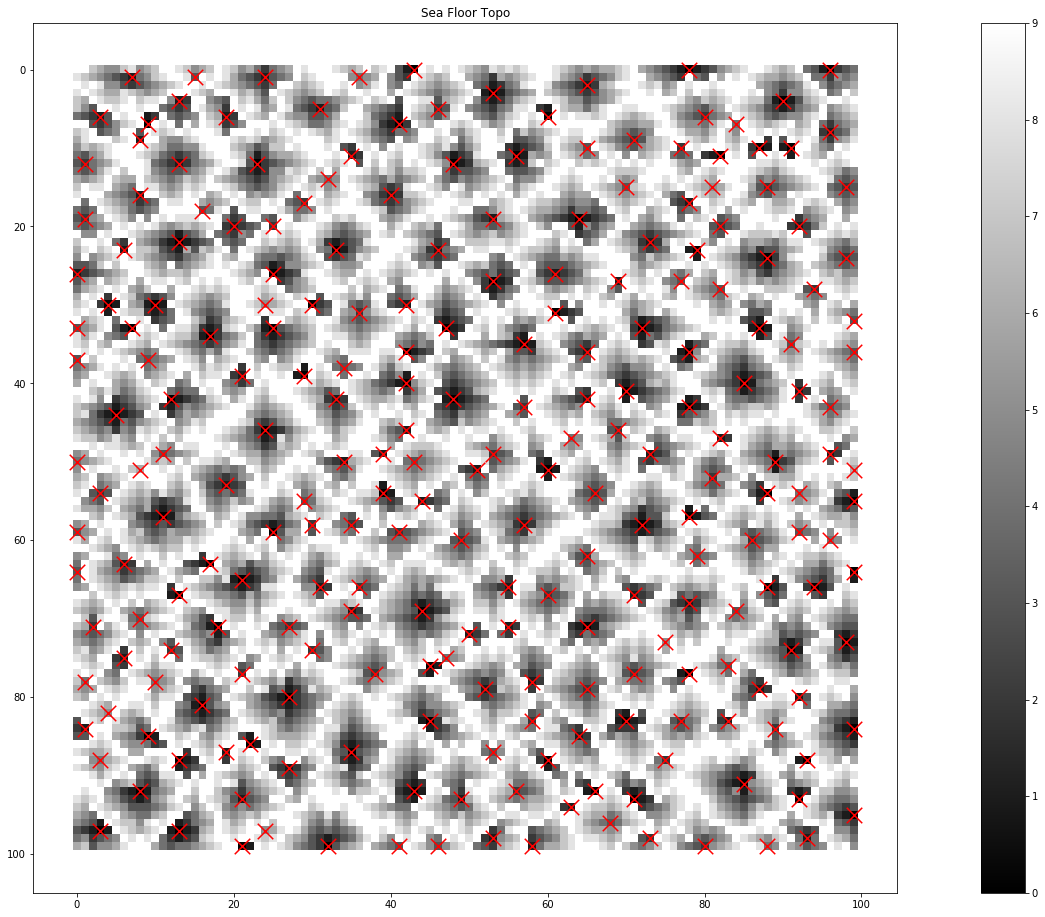

In [128]:
plotpoints = locallows.copy()

col = []
row = []
for i in range(len(plotpoints)):
    row.append(plotpoints[i][0])
    col.append(plotpoints[i][1])
H = data_test
scale = 5
##plt.figure()
plt.figure(figsize=(6*scale, 3.2*scale))
plt.imshow(H,cmap = "gray" , vmin=9, vmax=0)
plt.colorbar()
plt.scatter(col, row, marker='x', s = 240, color = 'red')
plt.title( 'Sea Floor Topo' )
plt.show()

In [95]:
# flash your neighbors function

def flashy(rows, cols):
    #xrange = [-1,-1,-1,0,0,1,1,1]
    #yrange = [-1,0,1,-1,1,-1,0,1]
    yrange = [0,1,-1,0]
    xrange = [1,0,0,-1]
    points = []
    ban1 = {-1}
    ban2 = {100}
    for i in range(len(xrange)): 
        points.append((rows+xrange[i],cols+yrange[i]))
    for i in range(len(points)):
        A = set(points[i])
        if ban1.issubset(A) == True:
            points[i] = ()
        if ban2.issubset(A) == True:
            points[i] = ()       
    points = list(filter((()).__ne__, points)).copy()
    return(points)

# check neighbors for elitism
def amnesia(array,i,j):
    for k in range(len(array)):
        if array[k] == [i,j]:
            return(True)
    return(False)

In [133]:
# Part 2: determine basin areas
s = perf_counter()
values = []
locallows = lowpoints.copy()

for i in range(len(locallows)):
    basinpoints=[]
    checked_points = []
    basinpoints.append(locallows[i])
    
    count = 0
    while True:
        for k in range(len(basinpoints)):
            if amnesia(checked_points,basinpoints[k][0],basinpoints[k][1]) == False:
                neighbors = flashy(basinpoints[k][0],basinpoints[k][1])
                for j in range(len(neighbors)):
                    if amnesia(checked_points,neighbors[j][0],neighbors[j][1]) == False:
                        if data_test[neighbors[j]] == 9:
                            checked_points.append([neighbors[j][0],neighbors[j][1]])
                        else: 
                            if amnesia(basinpoints,neighbors[j][0],neighbors[j][1]) == False:
                                basinpoints.append([neighbors[j][0],neighbors[j][1]])
            if amnesia(checked_points,basinpoints[k][0],basinpoints[k][1]) == False:
                checked_points.append(basinpoints[k])
        count += 1
        if count > 7:
            break
    values.append(len(basinpoints))
largestThree = []
while True:
    largestThree.append(max(values))
    values.remove(max(values))
    if len(largestThree) == 3:
        break
print("Part 2 Solution =",largestThree[0]*largestThree[1]*largestThree[2])
# Solution = 882942, confirmed 12/14/2021

e = perf_counter()
time = round((e - s),4)
print('Time Elapsed =',time)

Part 2 Solution = 882942
Time Elapsed = 0.3884
